# Linear Regression

Linear regression is a fundamental and widely used statistical technique in data analysis and machine learning. It is a powerful tool for **modeling and understanding the relationships between variables**. At its core, linear regression aims to establish a linear relationship between a **dependent variable** (the one you want to predict) and **one or more independent variables** (the ones used for prediction). This technique allows us to make predictions, infer associations, and gain insights into how changes in independent variables influence the target variable. Linear regression is both intuitive and versatile, making it a valuable tool for tasks ranging from simple trend analysis to more complex predictive modeling and hypothesis testing. 

In this context, we will explore the concepts and applications of linear regression, its different types, and how to implement it using Python.

## The Auto MPG Dataset

We will consider the [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset, which contains $398$ measurements of $8$ different properties of different cars:

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
data = X.join(y)
data


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


Here is a description of the different variables:

* **Displacement**: The engine's displacement (in cubic inches), which indicates the engine's size and power.
* **Cylinders**: The number of cylinders in the engine of the car. This is a categorical variable.
* **Horsepower**: The engine's horsepower, a measure of the engine's performance.
* **Weight**: The weight of the car in pounds.
* **Acceleration**: The car's acceleration (in seconds) from 0 to 60 miles per hour.
* **Model Year**: The year the car was manufactured. This is often converted into a categorical variable representing the car's age.
* **Origin**: The car's country of origin or manufacturing.
Car Name: The name or identifier of the car model.
* **MPG (Miles per Gallon)**: The fuel efficiency of the car in miles per gallon. It is the variable to be predicted in regression analysis.

We will start by exploring the relationship between the variables `horsepower` and `MPG`. Let's visualize the related scatterplot:

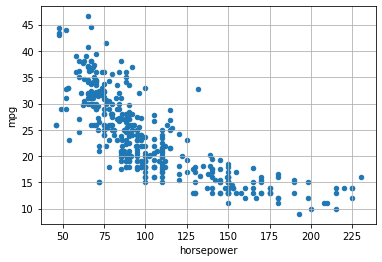

In [3]:
from matplotlib import pyplot as plt
data.plot.scatter(x='horsepower', y='mpg')
plt.grid()
plt.show()

## Regression Models
Regression models, in general, aim to **study the relationship between two variables**, $X$ and $Y$, by defining a mathematical model $f$ such that:

$$Y=f(X) + \epsilon$$

Here:
* $f$ is a deterministic function which can be used to **predict the values of $Y$ from the values of $X$**;
* $\epsilon$ is an **error term**, i.e., a variable capturing everything that is not captured by the deterministic function $f$. It can be due to different reasons, the main of which are:
  * $f$ is not an accurate deterministic function of the process. Since we don't know the "true" function $f$ and we are only estimating it, we may obtain a suboptimal $f$ for which $Y \neq f(X)$. The error term captures the differences between our predictions and the true values.
  * $Y$ cannot only be predicted from $X$, but some other variable is needed to correctly predict $Y$ from $X$. For instance, $X$ could be "years of education" and $Y$ can be "income". While may expect that "income" is not completely predicted from "years of education". This can happen also because we don't always have observations for all relevant variables.
  * the problem has inherent stochasticity which cannot be entirely modeled within the deterministic function $f$. For instance, consider the problem of predicting the rate of wins in poker based on the expertise of the player. The expertise surely allows to predict the rate of wins, but wins partially depend also on random factors, such as how the deck was shuffled.

Note that, often, we model $f$ in a way that we have its **analytical form**. This is very powerful. If we have the analytical form of the function $f$ which **explains** how $Y$ is influenced from $X$ (**can be predicted from $X$**), then we can really understand deeply the connection between the two variables!

The function $f$ can take different forms. The most common one is the **linear form** that we will see in the next section. While the linear form is very simple (and hence we can anticipate it will be a limited model in many cases), it has the great advantage to be **easy to interpret**.

## Simple Linear Regression
Simple linear regression aims to model the **linear relationship** between two variables $X$ and $Y$. In our example dataset, we will consider $X=\text{horsepower}$ and $Y=\text{mpg}$.

Since we are trying to model a linear relationship, we can imagine **a line passing through the data**. The simple linear regression model is defined as:

$$Y \approx \beta_0 + \beta_1X$$

In our example:

$$\text{mpg} \approx \beta_0 + \beta_1 \text{horsepower}$$

It is often common to introduce a **"noise" variable** which captures the randomness due to which the expression above is approximated and write:

$$Y = \beta_0 + \beta_1X + \epsilon$$

As we will see later, we expect $\epsilon$ to be **small and randomly distributed**.

Given the model above, we will call:

* $X$, the **dependent variable** or **regressor**;
* $Y$, the **independent variable** or **regressed variable**.

The values $\beta_0$ and $\beta_1$ are called **coefficients** or **parameters** of the model.

The mathematical model above has a geometrical interpretation. Indeed, specific values of $\beta_0$ and $\beta_1$ identify a given line in the 2D plane, as shown in the plot below:

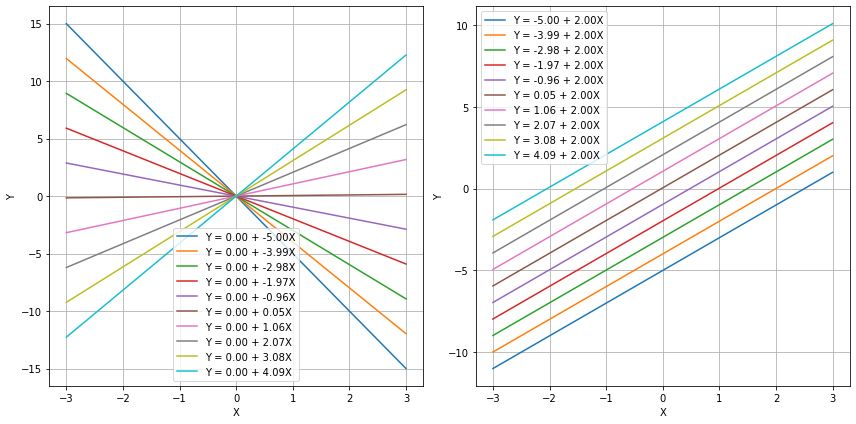

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data points
X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)

# Create a range of values for beta_1 (keeping beta_0 fixed at 0)
beta_0_fixed = 0
beta_1_values = np.linspace(-5, 5, 100)

# Create a range of values for beta_0 (keeping beta_1 fixed at 2)
beta_1_fixed = 2
beta_0_values = np.linspace(-5, 5, 100)

# Calculate the corresponding Y values for each combination of beta_0 and beta_1
Y_pred_beta1 = beta_0_fixed + beta_1_values * X[:, np.newaxis]
Y_pred_beta0 = beta_0_values + beta_1_fixed * X[:, np.newaxis]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot: Varying beta_1 with fixed beta_0
plt.subplot(1, 2, 1)
for i in range(0, len(beta_1_values), 10):
    plt.plot(X, Y_pred_beta1[:, i], label=f'Y = {beta_0_fixed:.2f} + {beta_1_values[i]:.2f}X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Second subplot: Varying beta_0 with fixed beta_1
plt.subplot(1, 2, 2)
for i in range(0, len(beta_0_values), 10):
    plt.plot(X, Y_pred_beta0[:, i], label=f'Y = {beta_0_values[i]:.2f} + {beta_1_fixed:.2f}X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


We hence aim to estimate two appropriate values $\hat \beta_0$ and $\hat \beta_1$ from data in a way that they provide a model which represent well our data. In the case of our example, we expect the geometrical model to have this aspect:

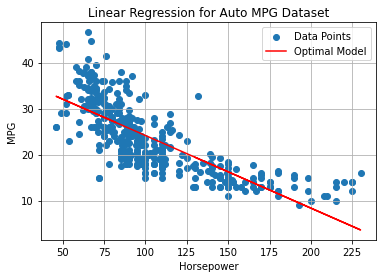

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression for Auto MPG Dataset")
plt.legend()
plt.grid(True)
plt.show()


This line will also be called the **regression line**.

### Estimating the Coefficients - Ordinary Least Squares (OLS)

To estimate the coefficients of our optimal model, we should first define what is a good model. We will say that **a good model is one that predicts well the $Y$ variable from the $X$ one**. We already know from the example above that, since the relationship is not perfectly linear, the model will make some mistakes. 

Let $\{(x_i,y_i)\}$ be our set of observations. Let

$$\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$$

be the prediction of the model for the observation $x_i$. For each data point $(x_i,y_i)$, we will define the deviation of the prediction from the $y_i$ value as follows:

$$e_i = y_i - \hat y_i$$

These numbers will be positive or negative based on whether we underestimate or overestimate the $y_i$ values. As a global error indicator for the model, given the data, we will define the **residual sum of squares (RSS)** as:

$$RSS = e_1^2 + e_2^2 + \ldots + e_n^2 $$

or equivalently:

$$RSS = (y_1 - \hat \beta_0 - \hat \beta_1 x_1)^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + \ldots + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2$$

This number will be the sum of the square values of the dashed segments in the plot below:

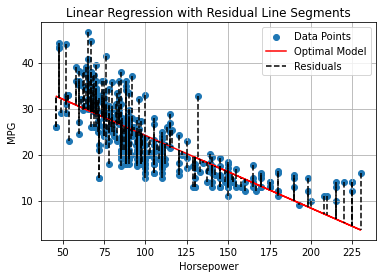

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

bool = True
# Plot residual line segments
for xi, yi, residual in zip(X, y, residuals):
    if bool:
        plt.plot([xi, xi], [yi, yi - residual], color="black", linestyle="--", label='Residuals')
        bool = False
    else:
        plt.plot([xi, xi], [yi, yi - residual], color="black", linestyle="--")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression with Residual Line Segments")
plt.legend()
plt.grid(True)
plt.show()


Intuitively, if we minimize these numbers, we will find the line which **best fits the data**. 

We can obtain estimates for $\hat \beta_0$ and $\hat \beta_1$ by minimizing the RSS using an approach called **ordinary least squares**. 

We can write the RSS value as:

$$RSS(\beta_0, \beta_1) = \sum_{i=1}^n(y_i - \beta_0 -  \beta_1 x_i)^2 $$

We aim to find:

$$(\hat \beta_0, \hat \beta_1) = \argmin_{\beta_0, \beta_1} RSS(\beta_0, \beta_1)$$

The minimum can be found setting:

$$\frac{\partial RSS(\beta_0, \beta_1)}{\partial \beta_0} = 0$$
$$\frac{\partial RSS(\beta_0, \beta_1)}{\partial \beta_1} = 0$$

Doing the math, it can be shown that:

$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n(x_i - \overline x)}$$
$$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$$

### Interpretation of the Coefficients of Linear Regression

Using the formulas above, we find the following values for the example above:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)

print(f"beta_0: {reg.intercept_:0.2f}")
print(f"beta_1: {reg.coef_[0]:0.2f}")

beta_0: 39.94
beta_1: -0.16


These parameters identify the following line:

$$y = 39.94 - 0.15 x$$

The plot below shows the line on the data:

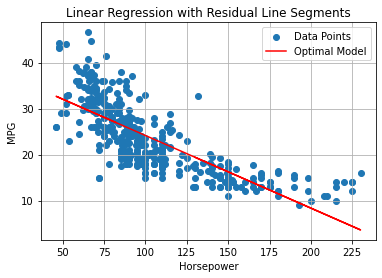

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression with Residual Line Segments")
plt.legend()
plt.grid(True)
plt.show()


Apart from the geometric interpretation, the coefficients of a linear regressor have an important **statistical interpretation**. In particular:

**The intercept $\beta_0$ is the value of $y$ that we get when the input value $x$ is equal to zero $x=0$ (i.e., $f(0)$)**. This value **may not always make sense**. For instance, in the example above, we have: $\beta_0 = -39.94$, which means that, **when the horsepower is $0$, then the consumption in mpg is equal to $-39.94$**. This is not a reasonable value, but, after all, also setting the horsepower to $0$ is not reasonable. We can see this as a "base value" which can be incremented or decremented based on the values of the independent variable $x$.

**The coefficient $\beta_1$ indicates the steepness of the curve**. If $\beta_1$ is large, then the curve is steep. This indicates that a small change in $x$ is associates to a large change in $y$. In general, we can see that: 

$$f(x+1)-f(x)=\beta_0+\beta_1 (x+1)-\beta_0-\beta_1 x=\beta_1 (x+1-x)=\beta_1$$

which reveals that **when we observe an increment of one unit of x, we observe an increment of $\beta_1$ units in y**. In our example, $\beta_1=0.15$, hence we can say that, for cars with one additional unit of horsepower, we observe an increment in consumption of $0.15$ units of mpg.

### Accuracy of the Coefficient Estimates
Recall that we are trying to model the relationship between two random variables $X$ as $Y$ with a simple linear model:

$$Y = \beta_0 + \beta_1X+\epsilon$$

This means that, once we find appropriate values of $\beta_0$ and $\beta_1$, we expect these to summarize the **linear relationship in the population** or the **population regression line**. Also, recall that these values are obtained using two formulas which are based on realizations of $X$ of $Y$ and can be hence seen as **estimators**:

$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n(x_i - \overline x)}$$
$$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$$

We now recall that, being estimates, they provide values related to a given **realization of the random variables**.

Let us consider an ideal population for which:

$$Y=2x+1$$

Ideally, given a sample from the population, we expect to obtain $\hat \beta_0 \approx 1$ and $\hat \beta_1 \approx 2$. In practice, different samples may lead to different estimates and hence different regression lines, as shown in the plot below:

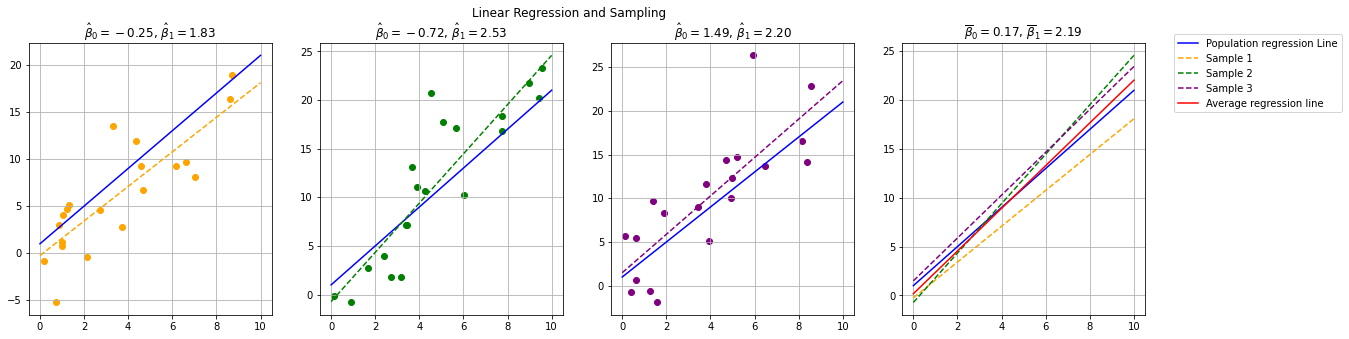

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# True population parameters for the linear relationship
true_slope = 2.0
true_intercept = 1.0
sigma2 = 4

# Generate data points from the population
np.random.seed(42)
population_x = np.linspace(0, 10, 1000)
population_y = true_slope * population_x + true_intercept

# Create a figure with the population regression line
plt.figure(figsize=(20, 5))


# Simulate different random samples from the population
num_samples = 3
sample_size = 20

plt.suptitle("Linear Regression and Sampling")

colors = ['orange','green','purple','red','brown','pink','gray']

slopes = []
intercepts = []

for i in range(num_samples):
    plt.subplot(1,num_samples+1,i+1)
    plt.plot(population_x, population_y, label="Population Regression Line", color="blue")
    sample_x = np.random.choice(population_x, sample_size)
    sample_y = true_intercept + true_slope*sample_x + np.random.normal(0,sigma2,sample_size)
    
    # Fit a linear regression model to the sample
    slope, intercept = np.polyfit(sample_x, sample_y, 1)
    sample_regression_y = slope * population_x + intercept

    slopes.append(slope)
    intercepts.append(intercept)

    plt.title(f"$\\hat \\beta_0={intercept:.2f}$, $\\hat \\beta_1={slope:.2f}$")

    # Plot the regression line for the current sample
    plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])
    plt.scatter(sample_x, sample_y, color=colors[i])
    plt.grid()


plt.subplot(1,num_samples+1,num_samples+1)
plt.plot(population_x, population_y, label="Population regression Line", color="blue")
for i in range(num_samples):
    sample_regression_y = slopes[i] * population_x + intercepts[i]

    # Plot the regression line for the current sample
    plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])

avg_slope = np.mean(slopes)
avg_intercept = np.mean(intercepts)

sample_regression_y = avg_slope * population_x + avg_intercept
plt.plot(population_x, sample_regression_y, linestyle='-', label=f"Average regression line", color=colors[i+1])
plt.title(f"$\\overline\u007b\\beta\u007d_0={avg_intercept:.2f}$, $\\overline\u007b\\beta\u007d_1={avg_slope:.2f}$")
plt.grid()
plt.legend(bbox_to_anchor=(1.1, 1.05))


plt.show()


Each of the first three subplots shows a different sample drawn from the population, with its corresponding estimated regression line, along with the true population regression line. The last subplot compares the different estimated lines with the population regression line and the average regression line (in red). Coefficient estimates are shown in the subplot titles.

As can be noted, each estimate can be inaccurate, while the average regression line is very close to the population regression line. This is due to the fact that our estimators for the parameters of the regression coefficients **have non-zero variance**. In practice, in can be shown that these estimators are **unbiased** (hence the average regression line is close to the population line).

A natural question is hence **"how do we assess how good our estimates of the regression coefficients are"**. We resort here to **statistical inference**. It can be shown that the squared standard errors associated to the coefficient estimates are:

$$SE(\hat \beta_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\overline x^2}{\sum_{i=1}^{n}(x_i-\overline x)^2}\right], SE(\hat \beta_1)^2 = \frac{\sigma_2}{\sum_{i=1}^{n}(x_i-\overline x)^2}$$

Where:

$$\sigma^2 = Var(\epsilon)$$

Note that $\sigma^2$ is generally unknown, but it can be estimated as the residual standard error:

$$RSE = \sqrt{\frac{RSS}{n-2}}$$

In the formulas above, we see that:

* The standard errors are proportional to $\sigma^2$. This is expected, as we will have more uncertainty when the variance of the error term is high, hence when the points are more **scattered around the population regression line**.
* The standard errors depend inversely on the $n\sigma_x^2 = \sum_{i=1}^n(x_i-\overline x)$ (the variance of $x$ multiplied by the sample size). This means that we will have more uncertainty in the estimates if $x$ concentrate in a narrow range.

The plot below shows some examples of fit for different values of $RSE$ and $n\sigma_x^2$:

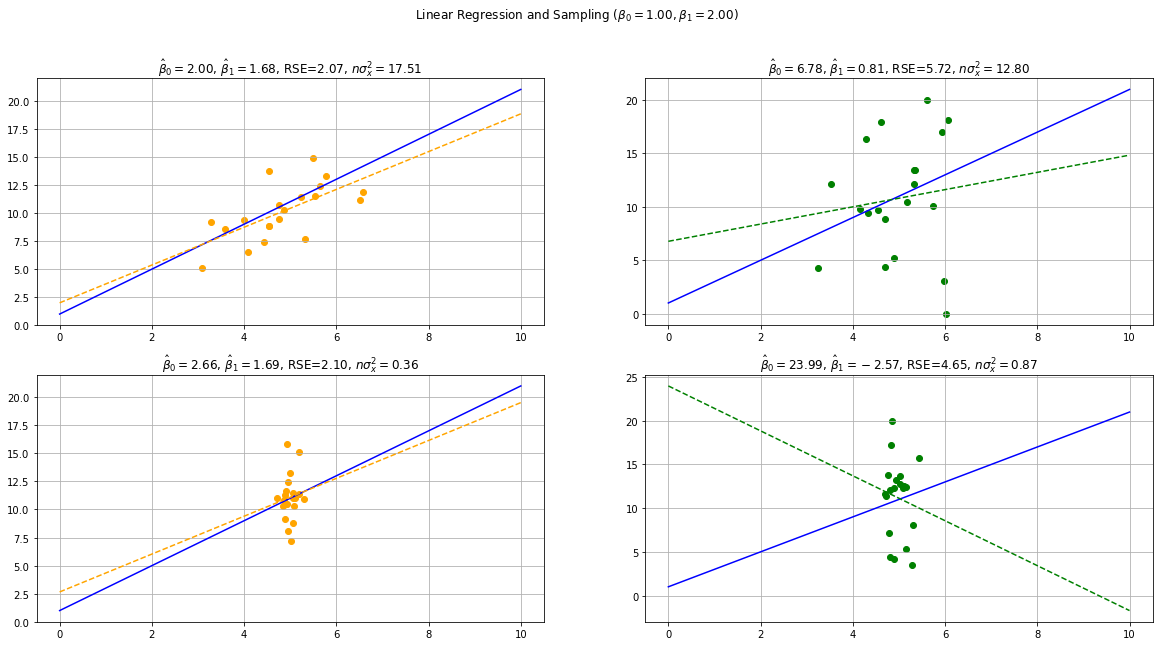

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# True population parameters for the linear relationship
true_slope = 2.0
true_intercept = 1.0
sigma2 = [2,5]
sigmax = [1,0.2]

# Generate data points from the population
np.random.seed(42)
population_x = np.linspace(0, 10, 1000)
population_y = true_slope * population_x + true_intercept

# Create a figure with the population regression line
plt.figure(figsize=(20, 10))


# Simulate different random samples from the population
num_samples = 2
sample_size = 20

plt.suptitle(f"Linear Regression and Sampling ($\\beta_0={true_intercept:.2f}, \\beta_1={true_slope:.2f}$)")

colors = ['orange','green','purple','red','brown','pink','gray']

slopes = []
intercepts = []

h=1

for j in range(len(sigmax)):
    for i in range(num_samples):
        plt.subplot(len(sigmax),num_samples,h); h+=1
        plt.plot(population_x, population_y, label="Population Regression Line", color="blue")
        #sample_x = np.random.choice(population_x, sample_size)
        sample_x = np.random.normal(5,sigmax[j],sample_size)
        sample_y = true_intercept + true_slope*sample_x + np.random.normal(0,sigma2[i],sample_size)

        RSE = np.sqrt(((true_intercept + true_slope*sample_x - sample_y)**2).sum()/(len(sample_x)-2))
        nsx = sample_x.var()*len(sample_x)
        
        # Fit a linear regression model to the sample
        slope, intercept = np.polyfit(sample_x, sample_y, 1)
        sample_regression_y = slope * population_x + intercept

        slopes.append(slope)
        intercepts.append(intercept)

        plt.title(f"$\\hat \\beta_0={intercept:.2f}$, $\\hat \\beta_1={slope:.2f}$, RSE={RSE:.2f}, $n\\sigma_x^2={nsx:.2f}$")

        # Plot the regression line for the current sample
        plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])
        plt.scatter(sample_x, sample_y, color=colors[i])
        plt.grid()


plt.show()


## Multiple Linear Regression